In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sn

# Data Import

In [ ]:
path = "/content/drive/My Drive/M2/Data Science for Business/Projet_DSfB_(trio)/1.Regression/"

df_type = pd.read_csv(path + 'data_type.csv', sep = ';')

variable_types = dict(zip(df_type.VarName, df_type.Type))

df = pd.read_csv(path + 'data_train_insurance.csv', sep = ';', dtype = variable_types, na_values = ('?'))

df.head()

,Id,Response_Market_Index,PROD_Formula,PER_sex,PER_Sex_Second_Driver,VEH_Actual_Value,CLA_HISTORY,CLA_HISTORY_1Y,CLA_HISTORY_3Y,CLA_BM_TPL_DECLARED,...,VEH_pw_proportion,VEH_High_Risk_Vehicle,PER_previous_insurer,PER_Is_second_driver,PER_Age_oldest_child,PER_Second_Driver_Age,PER_Insured_Before,VEH_Weight,GEO_Lat,GEO_Long
0,1638099,435.0,BASIC,2,0,4600.0,1.0,1.0,1.0,1.0,...,59.0,2,5,1,-99.0,-1.0,2,1125.0,-1.790876,-0.431147
1,1657342,609.0,FULL,1,0,68315.0,1.0,1.0,1.0,2.0,...,106.0,2,17,1,2.0,-1.0,2,1510.0,1.675824,-4.431147
2,1657529,609.0,FULL,1,0,68315.0,1.0,1.0,1.0,2.0,...,106.0,2,17,1,2.0,-1.0,2,1510.0,1.675824,-4.431147
3,1662071,404.0,FULL,1,2,11005.0,1.0,1.0,1.0,2.0,...,51.0,2,6,2,1.0,31.0,2,1170.0,-0.440876,1.285553
4,1662074,404.0,FULL,1,2,11005.0,1.0,1.0,1.0,2.0,...,51.0,2,6,2,1.0,31.0,2,1170.0,-0.440876,1.285553


In [ ]:
df.shape

(9983, 40)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9983 entries, 0 to 9982
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Id                             9983 non-null   object 
 1   Response_Market_Index          9983 non-null   float64
 2   PROD_Formula                   9983 non-null   object 
 3   PER_sex                        9983 non-null   object 
 4   PER_Sex_Second_Driver          9983 non-null   object 
 5   VEH_Actual_Value               9983 non-null   float64
 6   CLA_HISTORY                    9933 non-null   float64
 7   CLA_HISTORY_1Y                 9933 non-null   float64
 8   CLA_HISTORY_3Y                 9933 non-null   float64
 9   CLA_BM_TPL_DECLARED            9933 non-null   float64
 10  BEH_Mileage                    9933 non-null   float64
 11  PER_KIDS_ON_BOARD_ID           9933 non-null   object 
 12  VEH_Number_of_doors            9217 non-null   f

# Data preprocessing

## Missing Values

In [ ]:
# We are interested in variables with many missing values
VM = pd.DataFrame(df.isna().sum(), columns = ['Nb_valeurs_manquantes'])
VM['En_pourcentage'] = round(100*VM['Nb_valeurs_manquantes']/df.shape[0],2)
VM.sort_values(by = 'Nb_valeurs_manquantes', ascending = False).head()

,Nb_valeurs_manquantes,En_pourcentage
VEH_Injection_Mode,2563,25.67
PER_License_Age_Second_Driver,1052,10.54
PER_Matrimonial_Status,1052,10.54
VEH_Number_of_doors,766,7.67
VEH_Drive_type,50,0.50


In [ ]:
columns_NA = df.columns[df.isnull().any()].tolist()
print(np.shape(columns_NA)[0], ' variables possèdent au moins une valeur manquante parmi les', df.shape[1]-1, 'variables du dataset')

32  variables possèdent au moins une valeur manquante parmi les 39 variables du dataset


In [ ]:
# This time we're interested in the observations. How many missing values do they have?
rows_NA = df.T.columns[df.T.isnull().any()].tolist()
print(np.shape(rows_NA)[0], ' observations possèdent au moins une valeur manquante parmi les', df.T.shape[1], 'variables du dataset')

3808  observations possèdent au moins une valeur manquante parmi les 9983 variables du dataset


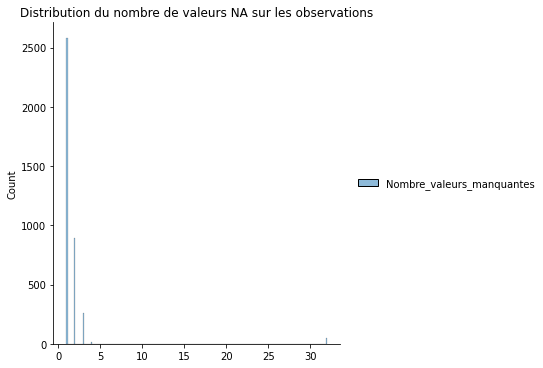

In [ ]:
# We're interested in the proportion of observations with a lot of missing values, in order to remove them.
df.iloc[rows_NA,:].isna().sum(axis = 1).sort_values(ascending = False)
NA_in8_obs = pd.DataFrame(df.iloc[rows_NA,:].isna().sum(axis = 1), columns = ['Nombre_valeurs_manquantes'])
sn.displot(NA_in8_obs, fill = True).set(title = 'Distribution du nombre de valeurs NA sur les observations')

In [ ]:
# We remove observations with at least 30 missing values out of 40, a minority of the total.
df1 = df.dropna(axis = 0, how = 'any', thresh = 40 - 30)

In [ ]:
# We remove observations with at least 30 missing values out of 40, a minority of the total.
VM1 = pd.DataFrame(df1.isna().sum(), columns = ['Nb_valeurs_manquantes'])
VM1['En_pourcentage'] = round(100*VM1['Nb_valeurs_manquantes']/df1.shape[0],2)
VM1.sort_values(by = 'Nb_valeurs_manquantes', ascending = False).head()

,Nb_valeurs_manquantes,En_pourcentage
VEH_Injection_Mode,2513,25.30
PER_Matrimonial_Status,1002,10.09
PER_License_Age_Second_Driver,1002,10.09
VEH_Number_of_doors,716,7.21
VEH_fuel_type,0,0.00


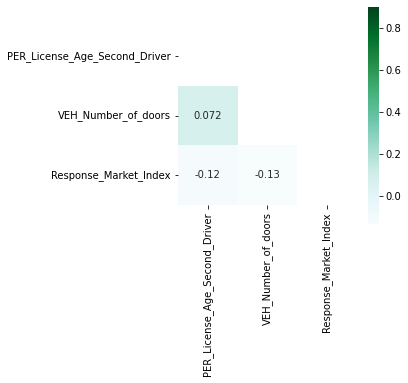

In [ ]:
var_NA = VM1.sort_values(by = 'Nb_valeurs_manquantes', ascending = False).head(4).index
df_try = df1.loc[:,var_NA]
df_try['Response_Market_Index'] = df1['Response_Market_Index']
corr = df_try.corr(method = 'pearson')
fig, ax = plt.subplots(figsize = (4,4))
mask = np.triu(np.ones_like(corr, dtype = bool)) #mask upper triangle
sn.heatmap(corr, mask = mask, vmax = 0.9, cmap='BuGn', square = True, annot = True)

In [ ]:
# In addition to having many missing values, they don't correlate well with the target variable.
# simply remove them
df2 = df1.dropna(axis = 1)

## Location variables

In [ ]:
df3 = df2.drop(['GEO_Lat','GEO_Long'], axis = 1).reset_index(drop = True)
# These variables are apparently of no interest, especially as they point to geographical areas off the African coast

## Logarithmize target variable

In [ ]:
df3['Log_Response_Market_Index'] = np.log(df3.Response_Market_Index)

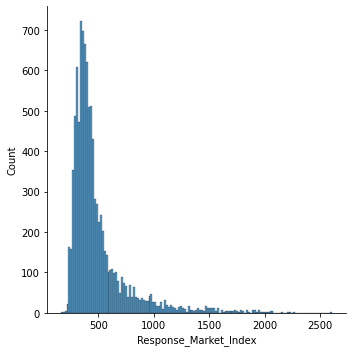

In [ ]:
sn.displot(df3['Response_Market_Index'])

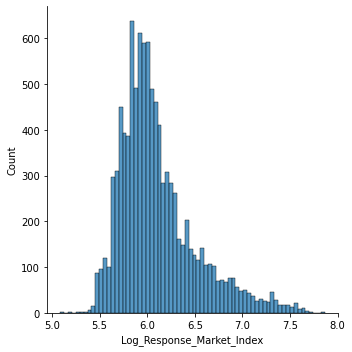

In [ ]:
sn.displot(df3['Log_Response_Market_Index'])

In [ ]:
df3.describe()

,Response_Market_Index,VEH_Actual_Value,CLA_HISTORY,CLA_HISTORY_1Y,CLA_HISTORY_3Y,CLA_BM_TPL_DECLARED,BEH_Mileage,VEH_Top_Speed,BEH_Number_Year_Insured,PER_Age_Main_Driver,PER_License_Age_Main_Driver,VEH_Age,CLA_BM,VEH_engine_HP,VEH_pw_proportion,PER_Age_oldest_child,PER_Second_Driver_Age,VEH_Weight,Log_Response_Market_Index
count,9933.000000,9.933000e+03,9933.000000,9933.000000,9933.000000,9933.000000,9933.000000,9933.000000,9933.000000,9933.000000,9933.000000,9933.000000,9933.000000,9933.000000,9933.000000,9933.000000,9933.000000,9933.000000,9933.000000
mean,494.287686,2.077474e+04,1.508205,1.124836,1.312393,1.646431,13.309977,187.541830,6.478808,38.314809,16.939495,8.788281,6.434109,116.328300,64.510823,-44.718011,4.390516,1314.165408,6.106161
std,269.164852,2.477800e+04,1.949901,0.952200,1.510256,2.180726,1.016209,24.391045,3.959938,12.224230,11.614645,4.984428,3.768526,42.120307,14.925362,55.379085,13.076905,249.981410,0.404493
min,162.000000,-1.765000e+03,1.000000,1.000000,1.000000,-1.000000,12.000000,0.000000,-1.000000,18.000000,0.000000,0.000000,0.000000,24.000000,30.000000,-99.000000,-1.000000,600.000000,5.087596
25%,342.000000,7.803000e+03,1.000000,1.000000,1.000000,1.000000,13.000000,175.000000,3.000000,29.000000,8.000000,5.000000,3.000000,90.000000,55.000000,-99.000000,-1.000000,1155.000000,5.834811
50%,407.570000,1.499800e+04,1.000000,1.000000,1.000000,1.000000,13.000000,187.000000,8.000000,35.000000,15.000000,8.000000,7.000000,110.000000,63.000000,-99.000000,-1.000000,1318.000000,6.010213
75%,532.000000,2.685800e+04,1.000000,1.000000,1.000000,1.000000,14.000000,201.000000,10.000000,45.000000,24.000000,12.000000,10.000000,140.000000,71.000000,10.000000,-1.000000,1470.000000,6.276643
max,2604.930000,1.132190e+06,11.000000,11.000000,11.000000,12.000000,18.000000,325.000000,10.000000,85.000000,59.000000,29.000000,10.000000,625.000000,304.000000,27.000000,69.000000,2475.000000,7.865161


## Initial analysis of some variables

### Create a list of variables to be removed

In [ ]:
col_to_delete = ['Id', 'PROD_Formula', 'PER_previous_insurer', 'PER_Age_oldest_child', 'PER_previous_insurer_cat', 'PER_Age_oldest_child_cat', 'BEH_vehicule_usage']

### Variable : PROD_Formula_Basic

**Variable Dummification**

In [ ]:
print(df2['PROD_Formula'].value_counts())

df2[['PROD_Formula_Basic', 'PROD_Formula_Full']] = pd.get_dummies(df2['PROD_Formula'])

FULL     6312
BASIC    3621
Name: PROD_Formula, dtype: int64


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


### Variable : PER_previous_insurer

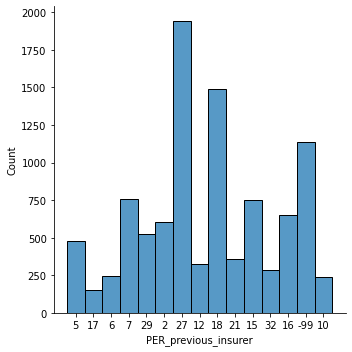

In [ ]:
sn.displot(df3['PER_previous_insurer'])

In [ ]:
print(df3['PER_previous_insurer'].value_counts().sort_values())
PI = np.sort(df3['PER_previous_insurer'].unique())
PI, len(PI)

17      149
10      237
6       244
32      285
12      326
21      359
5       478
29      525
2       606
16      648
15      751
7       758
-99    1139
18     1487
27     1941
Name: PER_previous_insurer, dtype: int64


(array(['-99', '10', '12', '15', '16', '17', '18', '2', '21', '27', '29',
        '32', '5', '6', '7'], dtype=object), 15)

**Variable categorization**

([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

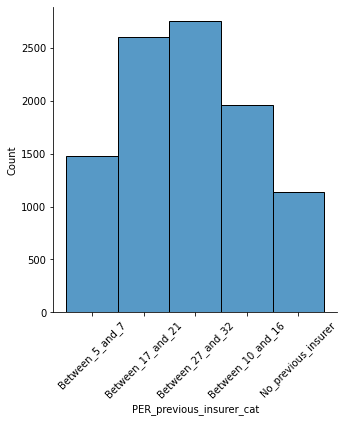

In [ ]:
 def categorize_PER_with_previous_insurer(x):
  if x == PI[0]: return ("No_previous_insurer")
  elif x in PI[1:5]: return ("Between_" + str(PI[1]) + "_and_" + str(PI[4]))
  elif x in PI[5:9]: return ("Between_" + str(PI[5]) + "_and_" + str(PI[8]))
  elif x in PI[9:12]: return ("Between_" + str(PI[9]) + "_and_" + str(PI[11]))
  else : return ("Between_" + str(PI[12]) + "_and_" + str(PI[14]))


df3['PER_previous_insurer_cat'] = df3['PER_previous_insurer'].apply(categorize_PER_with_previous_insurer)

sn.displot(df3['PER_previous_insurer_cat'])
plt.xticks(rotation = 45)

**Variable Dummification**

In [ ]:
PER_previous_insurer = pd.get_dummies(df3.PER_previous_insurer_cat, prefix = 'PER_previous_insurer')

In [ ]:
df3 = df3.merge(PER_previous_insurer, left_index = True, right_index = True).reset_index(drop = True)

### Variable : PER_Age_Main_Driver

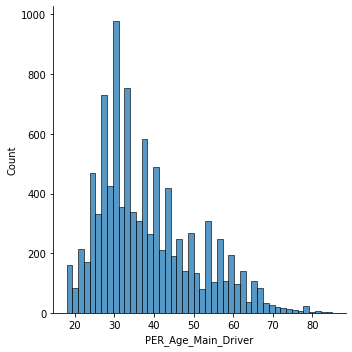

In [ ]:
sn.displot(df3.PER_Age_Main_Driver)

**Switch to logarithm**

In [ ]:
df3['Log_PER_Age_Main_Driver'] = np.log(df3.PER_Age_Main_Driver)

col_to_delete.append('PER_Age_Main_Driver')

### Variable : PER_Age_oldest_child

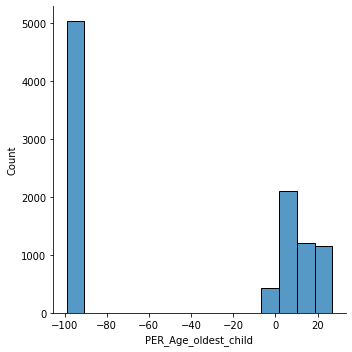

In [ ]:
sn.displot(df3['PER_Age_oldest_child'])

In [ ]:
df3['PER_Age_oldest_child'].value_counts().sort_values()

 27.0       1
 26.0       2
 11.0      99
 17.0     100
 16.0     125
 19.0     131
 15.0     132
 20.0     136
 14.0     141
 21.0     141
 13.0     143
 9.0      149
 18.0     152
 24.0     170
 22.0     173
 10.0     174
 7.0      184
 25.0     192
 23.0     209
 3.0      239
 5.0      241
 6.0      258
 8.0      261
 4.0      269
 12.0     318
 2.0      324
 1.0      427
-99.0    5042
Name: PER_Age_oldest_child, dtype: int64

**Variable categorization**

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

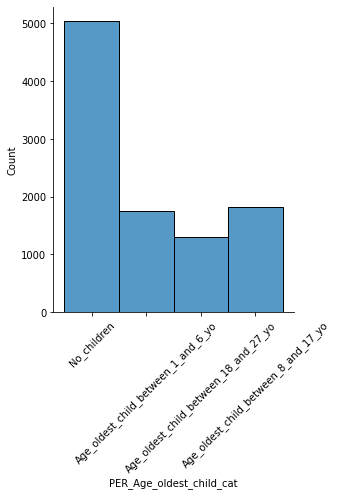

In [ ]:
 def categorize_PER_with_children(x):
  if x == -99: return ("No_children")
  elif 1 <= x < 7: return ("Age_oldest_child_between_1_and_6_yo")
  elif 7 <= x < 18: return ("Age_oldest_child_between_8_and_17_yo")
  else: return ("Age_oldest_child_between_18_and_27_yo")

df3['PER_Age_oldest_child_cat'] = df3['PER_Age_oldest_child'].apply(categorize_PER_with_children)

sn.displot(df3['PER_Age_oldest_child_cat'])
plt.xticks(rotation = 45)

**Variable Dummification**

In [ ]:
PER_Age_oldest_child = pd.get_dummies(df3.PER_Age_oldest_child_cat, prefix = 'PER')

In [ ]:
df3 = df3.merge(PER_Age_oldest_child, left_index = True, right_index = True).reset_index(drop = True)

### Variable : PER_Insured_Before

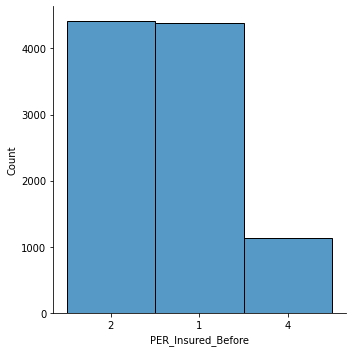

In [ ]:
sn.displot(df3.PER_Insured_Before)

**Variable Dummification**

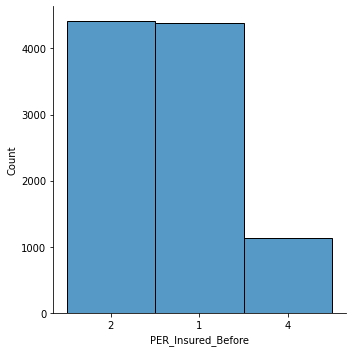

In [ ]:
sn.displot(df3.PER_Insured_Before)

PER_Insured_Before_dum = pd.get_dummies(df3['PER_sex'], prefix = 'PER_Insured_Before')

df3 = df3.merge(PER_Insured_Before_dum, left_index = True, right_index = True).reset_index(drop = True)

col_to_delete.append('PER_Insured_Before')

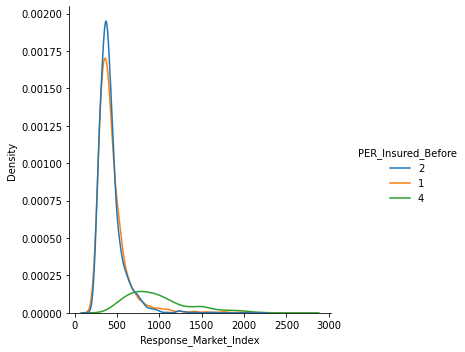

In [ ]:
sn.displot(df3, x = "Response_Market_Index", hue = 'PER_Insured_Before', kind = 'kde', fill = False)

### Variable : PER_Sex

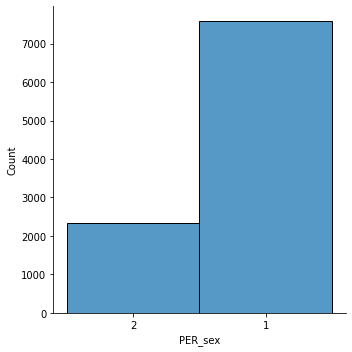

In [ ]:
sn.displot(df3.PER_sex)

**Variable Dummification**

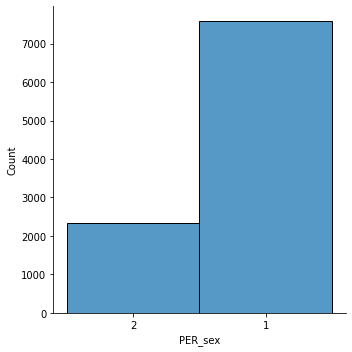

In [ ]:
sn.displot(df3.PER_sex)

df3[['Sex_1', 'Sex_2']] = pd.get_dummies(df3['PER_sex'])

col_to_delete.append('PER_sex')

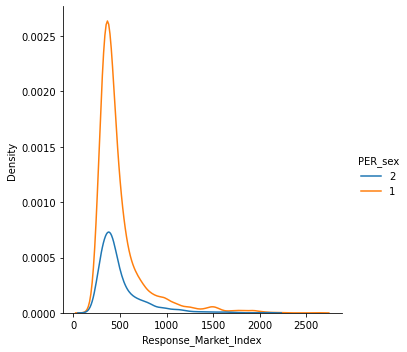

In [ ]:
sn.displot(df3, x = "Response_Market_Index", hue = 'PER_sex', kind = 'kde', fill = False)

### Variable : PER_Sex_second_driver

**Variable Dummification**

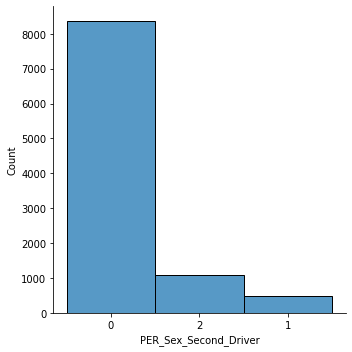

In [ ]:
sn.displot(df3.PER_Sex_Second_Driver)
# une majorité de voiture n'ont pas de second conducteurs

df3[['No_second_driver', 'Sex_second_driver_1', 'Sex_second_driver_2']] = pd.get_dummies(df3['PER_Sex_Second_Driver'])

col_to_delete.append('PER_Sex_Second_Driver') # notre dummification fait déjà apparaître le fait qu'il y ait ou non un deuxième conducteur
col_to_delete.append('PER_Is_second_driver')

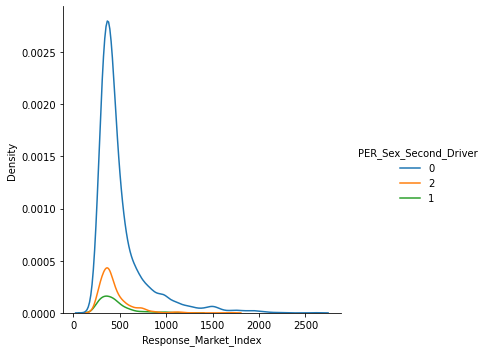

In [ ]:
sn.displot(df3, x = "Response_Market_Index", hue = 'PER_Sex_Second_Driver', kind = 'kde', fill = False)

### Variable : PER_Second_Driver_Age

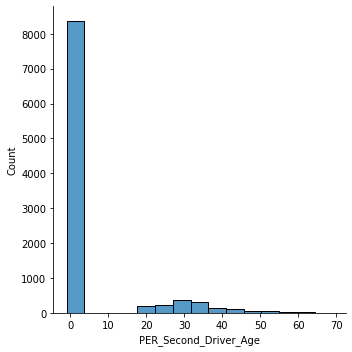

In [ ]:
sn.displot(df3.PER_Second_Driver_Age)

In [ ]:
np.sort(df3.PER_Second_Driver_Age.unique())

array([-1., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
       56., 57., 58., 59., 60., 61., 62., 63., 65., 66., 67., 69.])

**Variable Categorization**

In [ ]:
df3.PER_Second_Driver_Age.value_counts().sort_index()

-1.0     8365
 18.0      50
 19.0      37
 20.0      27
 21.0      33
 22.0      48
 23.0      40
 24.0      48
 25.0      76
 26.0      54
 27.0      70
 28.0      77
 29.0      74
 30.0      57
 31.0     100
 32.0      64
 33.0      65
 34.0      54
 35.0     106
 36.0      37
 37.0      61
 38.0      29
 39.0      24
 40.0      36
 41.0      38
 42.0      31
 43.0      24
 44.0      16
 45.0      10
 46.0      24
 47.0       1
 48.0       3
 49.0       8
 50.0       6
 51.0      29
 52.0      11
 53.0      11
 54.0      13
 55.0      15
 56.0       4
 57.0       9
 58.0       7
 59.0       2
 60.0      12
 61.0       3
 62.0       6
 63.0      10
 65.0       1
 66.0       2
 67.0       1
 69.0       4
Name: PER_Second_Driver_Age, dtype: int64

([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

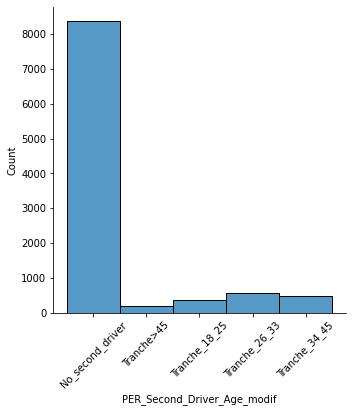

In [ ]:
def change_PER_Second_Driver_Age (x):
  if x == -1 : return 'No_second_driver'
  elif 18 <= x <= 25 : return 'Tranche_18_25'
  elif 25 < x <= 33 : return 'Tranche_26_33'
  elif 33 < x <= 45 : return 'Tranche_34_45'
  else : return 'Tranche>45'

df3['PER_Second_Driver_Age_modif'] = df3.PER_Second_Driver_Age.apply(change_PER_Second_Driver_Age).astype('category')

col_to_delete.append('PER_Second_Driver_Age')

sn.displot(df3.PER_Second_Driver_Age_modif)
plt.xticks(rotation = 45)

**Variable Dummification**

In [ ]:
PER_Second_Driver_Age_dum = pd.get_dummies(df3.PER_Second_Driver_Age_modif, prefix = 'PER_second_driver_age').drop('PER_second_driver_age_No_second_driver', axis = 1)
col_to_delete.append('PER_Second_Driver_Age_modif')

In [ ]:
df3 = df3.merge(PER_Second_Driver_Age_dum, left_index = True, right_index = True).reset_index(drop = True)

### Variable CLA_HISTORY (observation graphique)

,CLA_HISTORY,En pourcentage
1.0,8413,84.70
2.0,1128,11.36
11.0,392,3.95


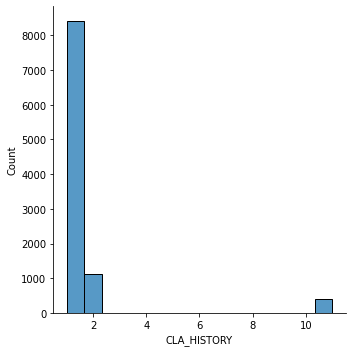

In [ ]:
sn.displot(df3.CLA_HISTORY)
CLA_Hist = pd.DataFrame(df3.CLA_HISTORY.value_counts())
CLA_Hist['En pourcentage'] = round(CLA_Hist['CLA_HISTORY']*100/np.sum(CLA_Hist['CLA_HISTORY']),2)
#col_to_delete.append('CLA_HISTORY')
CLA_Hist

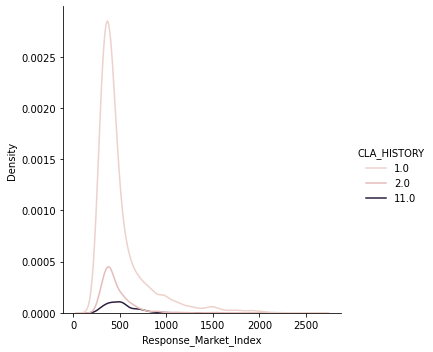

In [ ]:
sn.displot(df3, x = "Response_Market_Index", hue = 'CLA_HISTORY', kind = 'kde', fill = False)

### Variable : CLA_HISTORY_1Y (observation graphique)

,CLA_HISTORY_1Y,En pourcentage
1.0,9485,95.49
2.0,360,3.62
11.0,88,0.89


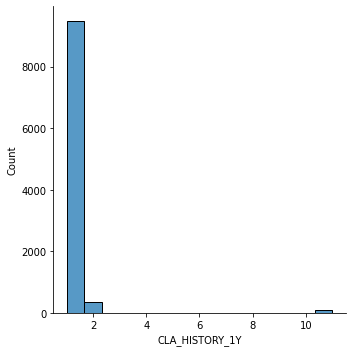

In [ ]:
sn.displot(df3.CLA_HISTORY_1Y)

CLA_Hist_1Y = pd.DataFrame(df3.CLA_HISTORY_1Y.value_counts())
CLA_Hist_1Y['En pourcentage'] = round(CLA_Hist_1Y['CLA_HISTORY_1Y']*100/np.sum(CLA_Hist_1Y['CLA_HISTORY_1Y']),2)
#col_to_delete.append('CLA_HISTORY_1Y')
CLA_Hist_1Y

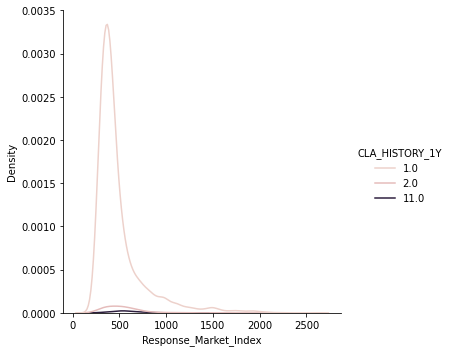

In [ ]:
sn.displot(df3, x = "Response_Market_Index", hue = 'CLA_HISTORY_1Y', kind = 'kde', fill = False)

### Variable : CLA_HISTORY_3Y (graphical observation)

,CLA_HISTORY_3Y,En pourcentage
1.0,8882,89.42
2.0,823,8.29
11.0,228,2.30


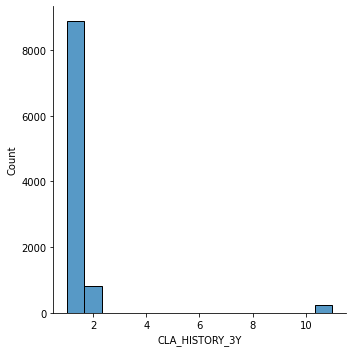

In [ ]:
sn.displot(df3.CLA_HISTORY_3Y)
CLA_Hist_3Y = pd.DataFrame(df3.CLA_HISTORY_3Y.value_counts())
CLA_Hist_3Y['En pourcentage'] = round(CLA_Hist_3Y['CLA_HISTORY_3Y']*100/np.sum(CLA_Hist_3Y['CLA_HISTORY_3Y']),2)
#col_to_delete.append('CLA_HISTORY_3Y')
CLA_Hist_3Y

In [ ]:
def CLA_history_resume (df3, x):
  if df3.loc[x,'CLA_HISTORY_3Y'] == 1 and df3.loc[x,'CLA_HISTORY_1Y'] == 1 and df3.loc[x,'CLA_HISTORY'] == 1:
    return '1 to 1 to 1'
  elif df3.loc[x,'CLA_HISTORY_3Y'] == 1 and df3.loc[x,'CLA_HISTORY_1Y'] == 1 and df3.loc[x,'CLA_HISTORY'] == 2:
    return '1 to 1 to 2'
  elif df3.loc[x,'CLA_HISTORY_3Y'] == 1 and df3.loc[x,'CLA_HISTORY_1Y'] == 1 and df3.loc[x,'CLA_HISTORY'] == 11:
    return '1 to 1 to 11'
  elif df3.loc[x,'CLA_HISTORY_3Y'] == 1 and df3.loc[x,'CLA_HISTORY_1Y'] == 2 and df3.loc[x,'CLA_HISTORY'] == 1:
    return '1 to 2 to 1'
  elif df3.loc[x,'CLA_HISTORY_3Y'] == 1 and df3.loc[x,'CLA_HISTORY_1Y'] == 2 and df3.loc[x,'CLA_HISTORY'] == 2:
    return '1 to 2 to 2'
  elif df3.loc[x,'CLA_HISTORY_3Y'] == 1 and df3.loc[x,'CLA_HISTORY_1Y'] == 2 and df3.loc[x,'CLA_HISTORY'] == 11:
    return '1 to 2 to 11'
  elif df3.loc[x,'CLA_HISTORY_3Y'] == 1 and df3.loc[x,'CLA_HISTORY_1Y'] == 11 and df3.loc[x,'CLA_HISTORY'] == 1:
    return '1 to 11 to 1'
  elif df3.loc[x,'CLA_HISTORY_3Y'] == 1 and df3.loc[x,'CLA_HISTORY_1Y'] == 11 and df3.loc[x,'CLA_HISTORY'] == 2:
    return '1 to 11 to 2'
  elif df3.loc[x,'CLA_HISTORY_3Y'] == 1 and df3.loc[x,'CLA_HISTORY_1Y'] == 11 and df3.loc[x,'CLA_HISTORY'] == 11:
    return '1 to 11 to 11'

  elif df3.loc[x,'CLA_HISTORY_3Y'] == 2 and df3.loc[x,'CLA_HISTORY_1Y'] == 1 and df3.loc[x,'CLA_HISTORY'] == 1:
    return '2 to 1 to 1'
  elif df3.loc[x,'CLA_HISTORY_3Y'] == 2 and df3.loc[x,'CLA_HISTORY_1Y'] == 1 and df3.loc[x,'CLA_HISTORY'] == 2:
    return '2 to 1 to 2'
  elif df3.loc[x,'CLA_HISTORY_3Y'] == 2 and df3.loc[x,'CLA_HISTORY_1Y'] == 1 and df3.loc[x,'CLA_HISTORY'] == 11:
    return '2 to 1 to 11'
  elif df3.loc[x,'CLA_HISTORY_3Y'] == 2 and df3.loc[x,'CLA_HISTORY_1Y'] == 2 and df3.loc[x,'CLA_HISTORY'] == 1:
    return '2 to 2 to 1'
  elif df3.loc[x,'CLA_HISTORY_3Y'] == 2 and df3.loc[x,'CLA_HISTORY_1Y'] == 2 and df3.loc[x,'CLA_HISTORY'] == 2:
    return '2 to 2 to 2'
  elif df3.loc[x,'CLA_HISTORY_3Y'] == 2 and df3.loc[x,'CLA_HISTORY_1Y'] == 2 and df3.loc[x,'CLA_HISTORY'] == 11:
    return '2 to 2 to 11'
  elif df3.loc[x,'CLA_HISTORY_3Y'] == 2 and df3.loc[x,'CLA_HISTORY_1Y'] == 11 and df3.loc[x,'CLA_HISTORY'] == 1:
    return '2 to 11 to 1'
  elif df3.loc[x,'CLA_HISTORY_3Y'] == 2 and df3.loc[x,'CLA_HISTORY_1Y'] == 11 and df3.loc[x,'CLA_HISTORY'] == 2:
    return '2 to 11 to 2'
  elif df3.loc[x,'CLA_HISTORY_3Y'] == 2 and df3.loc[x,'CLA_HISTORY_1Y'] == 11 and df3.loc[x,'CLA_HISTORY'] == 11:
    return '2 to 11 to 11'

  elif df3.loc[x,'CLA_HISTORY_3Y'] == 11 and df3.loc[x,'CLA_HISTORY_1Y'] == 1 and df3.loc[x,'CLA_HISTORY'] == 1:
    return '11 to 1 to 1'
  elif df3.loc[x,'CLA_HISTORY_3Y'] == 11 and df3.loc[x,'CLA_HISTORY_1Y'] == 1 and df3.loc[x,'CLA_HISTORY'] == 2:
    return '11 to 1 to 2'
  elif df3.loc[x,'CLA_HISTORY_3Y'] == 11 and df3.loc[x,'CLA_HISTORY_1Y'] == 1 and df3.loc[x,'CLA_HISTORY'] == 11:
    return '11 to 1 to 11'
  elif df3.loc[x,'CLA_HISTORY_3Y'] == 11 and df3.loc[x,'CLA_HISTORY_1Y'] == 2 and df3.loc[x,'CLA_HISTORY'] == 1:
    return '11 to 2 to 1'
  elif df3.loc[x,'CLA_HISTORY_3Y'] == 11 and df3.loc[x,'CLA_HISTORY_1Y'] == 2 and df3.loc[x,'CLA_HISTORY'] == 2:
    return '11 to 2 to 2'
  elif df3.loc[x,'CLA_HISTORY_3Y'] == 11 and df3.loc[x,'CLA_HISTORY_1Y'] == 2 and df3.loc[x,'CLA_HISTORY'] == 11:
    return '11 to 2 to 11'
  elif df3.loc[x,'CLA_HISTORY_3Y'] == 11 and df3.loc[x,'CLA_HISTORY_1Y'] == 11 and df3.loc[x,'CLA_HISTORY'] == 1:
    return '11 to 11 to 1'
  elif df3.loc[x,'CLA_HISTORY_3Y'] == 11 and df3.loc[x,'CLA_HISTORY_1Y'] == 11 and df3.loc[x,'CLA_HISTORY'] == 2:
    return '11 to 11 to 2'
  elif df3.loc[x,'CLA_HISTORY_3Y'] == 11 and df3.loc[x,'CLA_HISTORY_1Y'] == 11 and df3.loc[x,'CLA_HISTORY'] == 11:
    return '11 to 11 to 11'


**Simple observation of the different movements of the CLA_History variable over the years**

In [ ]:
List_CLA_H_resume = []
for i in range (len(df3)):
  List_CLA_H_resume.append(CLA_history_resume(df3,i))

In [ ]:
D = pd.DataFrame(List_CLA_H_resume)
D.value_counts()

1 to 1 to 1       8413
2 to 1 to 2        472
1 to 1 to 2        350
2 to 2 to 2        306
1 to 1 to 11       119
11 to 1 to 11      100
11 to 11 to 11      88
11 to 2 to 11       40
2 to 1 to 11        31
2 to 2 to 11        14
dtype: int64

### Variable : CLA_BM

,CLA_BM,En pourcentage
10,4020,40.47
0,1403,14.12
7,1050,10.57
5,635,6.39
6,489,4.92
2,487,4.90
8,405,4.08
3,375,3.78
1,363,3.65
4,361,3.63


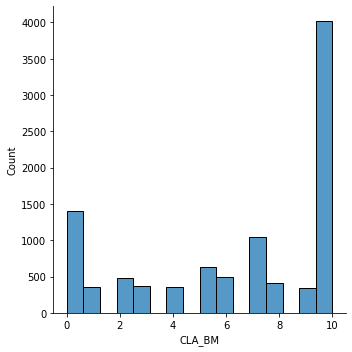

In [ ]:
sn.displot(df3.CLA_BM)

df3.CLA_BM = df3.CLA_BM.astype('int')
CLA_BM = pd.DataFrame(df3.CLA_BM.value_counts())
CLA_BM['En pourcentage'] = round(CLA_BM['CLA_BM']*100/np.sum(CLA_BM['CLA_BM']),2)

CLA_BM

**Variable Categorization**

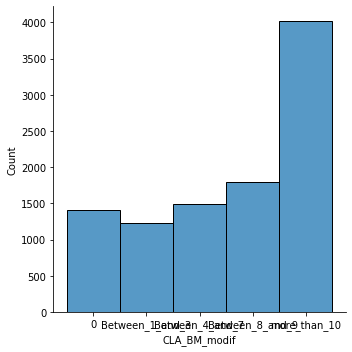

In [ ]:
def change_CLA_BM (x):
  if x == 0 : return '0'
  elif 1 <= x < 4 : return 'Between_1_and_3'
  elif 4 <= x < 7 : return 'Between_4_and_7'
  elif 7 <= x < 10 : return 'Between_8_and_9'
  else : return 'more_than_10'

df3['CLA_BM_modif'] = df3.CLA_BM.apply(change_CLA_BM).astype('category')

col_to_delete.append('CLA_BM')
sn.displot(df3.CLA_BM_modif)

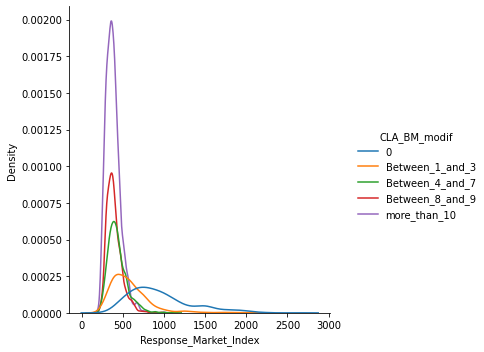

In [ ]:
sn.displot(df3, x = "Response_Market_Index", hue = 'CLA_BM_modif', kind = 'kde', fill = False)

**Variable Dummification**

In [ ]:
CLA_BM_modif_dum = pd.get_dummies(df3.CLA_BM_modif, prefix = 'CLA_BM')
col_to_delete.append('CLA_BM_modif')

In [ ]:
df3 = df3.merge(CLA_BM_modif_dum, left_index = True, right_index = True).reset_index(drop = True)

### Variable : CLA_BM_TPL_DECLARED

,CLA_BM_TPL_DECLARED,En pourcentage
1,6649,66.94
-1,1139,11.47
7,700,7.05
2,441,4.44
3,257,2.59
6,235,2.37
4,212,2.13
5,212,2.13
11,35,0.35
12,34,0.34


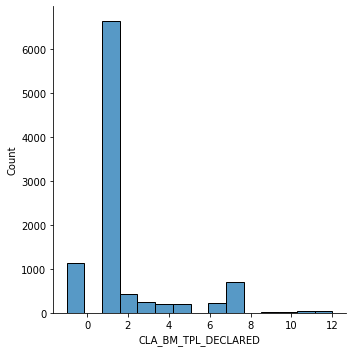

In [ ]:
sn.displot(df3.CLA_BM_TPL_DECLARED)

df3.CLA_BM_TPL_DECLARED = df3.CLA_BM_TPL_DECLARED.astype('int')
CLA_BM_TPL_DECLARED = pd.DataFrame(df3.CLA_BM_TPL_DECLARED.value_counts())
CLA_BM_TPL_DECLARED['En pourcentage'] = round(CLA_BM_TPL_DECLARED['CLA_BM_TPL_DECLARED']*100/np.sum(CLA_BM_TPL_DECLARED['CLA_BM_TPL_DECLARED']),2)

CLA_BM_TPL_DECLARED

**Variable Categorization**

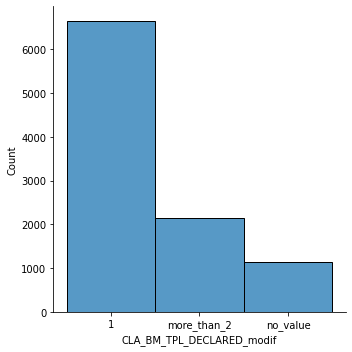

In [ ]:
def change_CLA_BM_TPL_DECLARED (x):
  if x == -1 : return 'no_value'
  elif x == 1 : return '1'
  else : return 'more_than_2'

df3['CLA_BM_TPL_DECLARED_modif'] = df3.CLA_BM_TPL_DECLARED.apply(change_CLA_BM_TPL_DECLARED).astype('category')

col_to_delete.append('CLA_BM_TPL_DECLARED')
sn.displot(df3.CLA_BM_TPL_DECLARED_modif)

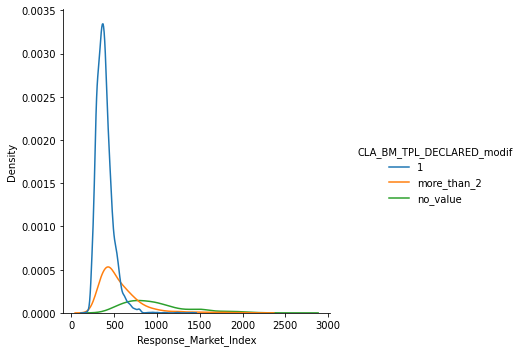

In [ ]:
sn.displot(df3, x = "Response_Market_Index", hue = 'CLA_BM_TPL_DECLARED_modif', kind = 'kde', fill = False)

**Variable Dummification**

In [ ]:
CLA_BM_TPL_DECLARED_modif_dum = pd.get_dummies(df3.CLA_BM_TPL_DECLARED_modif, prefix = 'CLA_BM_TPL_DECLARED')
col_to_delete.append('CLA_BM_TPL_DECLARED_modif')

In [ ]:
df3 = df3.merge(CLA_BM_TPL_DECLARED_modif_dum, left_index = True, right_index = True).reset_index(drop = True)

### Variable : VEH_Actual_Value

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


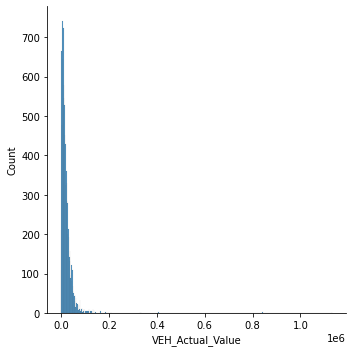

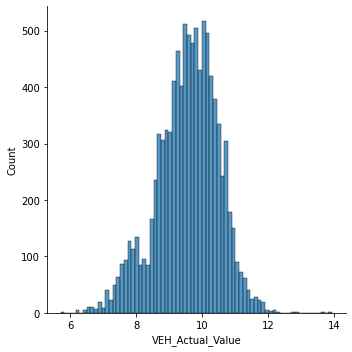

In [ ]:
sn.displot((df3.VEH_Actual_Value))
sn.displot(np.log(df3.VEH_Actual_Value))

In [ ]:
df3.VEH_Actual_Value.nsmallest()

7625   -1765.0
1290    -479.0
100        0.0
104        0.0
207        0.0
Name: VEH_Actual_Value, dtype: float64

**Revaluation of small values**

In [ ]:
# Variable : valeur actuelle du véhicule, on passe les deux valeurs négatives et les 0 à 1 pour que le passage au log les ramène à 0
# il y a 107 valeurs égales à 0, on prendra les 109 plus petites pour faire le remplacement

index_veh_value_to_replace = df3.VEH_Actual_Value.nsmallest(109).index
df3.loc[index_veh_value_to_replace, 'VEH_Actual_Value'] = 1

**Switch to log**

In [ ]:
df3['Log_VEH_Actual_Value'] = np.log(df3.VEH_Actual_Value)
col_to_delete.append('VEH_Actual_Value')

### Variable : VEH_segment

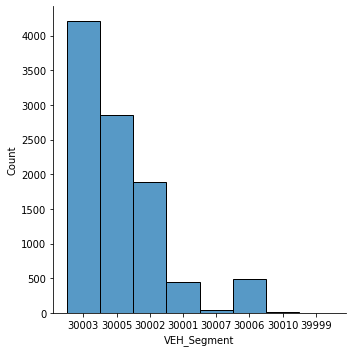

In [ ]:
sn.displot(df3.VEH_Segment)

In [ ]:
# on enlève les trois observations à qui ont été attribuées des valeurs extravagantes
outlier_VEH_Segment = df3.loc[df3['VEH_Segment'] == '39999',:].index
df3 = df3.drop(index = outlier_VEH_Segment).reset_index(drop = True)

**Revaluation of the variable and grouping of low-occurrence modalities**

In [ ]:
def change_VEH_seg (x):
  if x == '30001': return 1
  elif x == '30002' : return 2
  elif x == '30003' : return 3
  elif x == '30005' : return 5
  elif x in ['30006', '30007', '30010'] : return '6+'

df3['VEH_Segment_modif'] = df3.VEH_Segment.apply(change_VEH_seg).astype('category')
col_to_delete.append('VEH_Segment')

In [ ]:
df3['VEH_Segment_modif'].unique()
df3['VEH_Segment_modif'].value_counts()

3     4212
5     2849
2     1885
6+     543
1      441
Name: VEH_Segment_modif, dtype: int64

**Variable Dummification**

In [ ]:
VEH_Segment_modif_dum = pd.get_dummies(df3.VEH_Segment_modif, prefix = 'VEH_Segment')
col_to_delete.append('VEH_Segment_modif')

In [ ]:
df3 = df3.merge(VEH_Segment_modif_dum, left_index = True, right_index = True).reset_index(drop = True)

### Variable : VEH_High_Risk_Vehicle

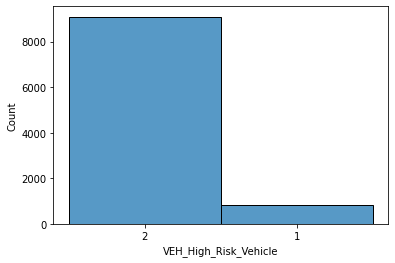

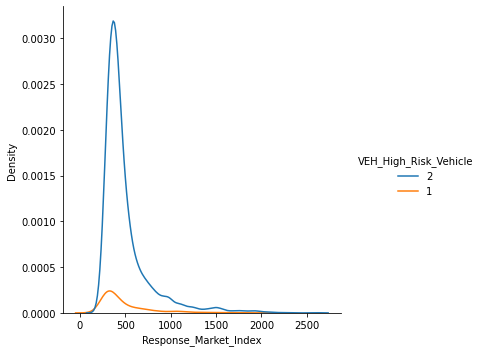

In [ ]:
sn.histplot(df3['VEH_High_Risk_Vehicle'])
sn.displot(df3, x = "Response_Market_Index", hue = "VEH_High_Risk_Vehicle", kind = "kde", fill = False)

### Variable : VEH_Top_Speed

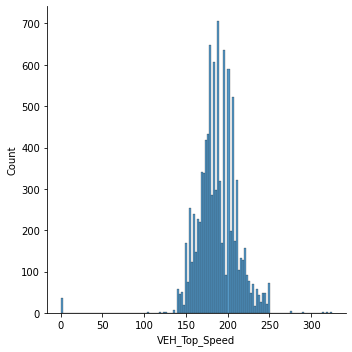

In [ ]:
sn.displot(df3.VEH_Top_Speed)

**Modification of null values**

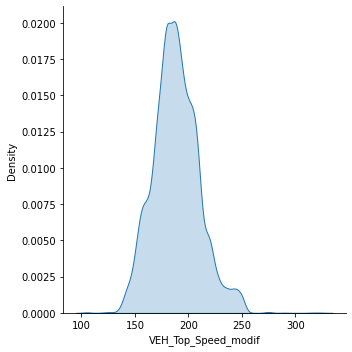

In [ ]:
# on remplace les 0 par la valeur médiane

med_VEH_Top_Speed = df3.VEH_Top_Speed.median()

df3['VEH_Top_Speed_modif'] = df3.VEH_Top_Speed.replace(to_replace = 0, value = med_VEH_Top_Speed)
sn.displot(df3.VEH_Top_Speed_modif, kind = 'kde', fill = True)

col_to_delete.append('VEH_Top_Speed')

### Variable : VEH_Drive_type

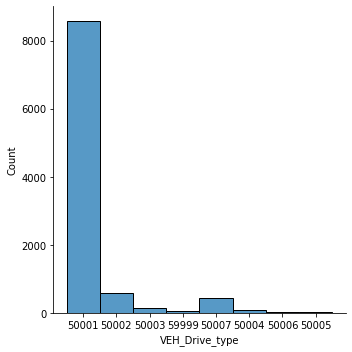

In [ ]:
sn.displot(df3.VEH_Drive_type)

**Variable Categorization**

In [ ]:
def change_VEH_Drive_type (x):
  if x == '50001': return '1'
  elif x in ['50002', '50003', '50004', '50005', '50006', '59999'] : return 'other'


df3['VEH_Drive_type_modif'] = df3.VEH_Drive_type.apply(change_VEH_Drive_type).astype('category')
col_to_delete.append('VEH_Drive_type')

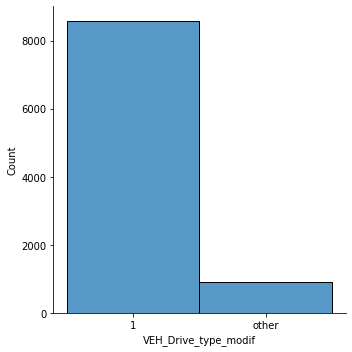

In [ ]:
sn.displot(df3.VEH_Drive_type_modif)

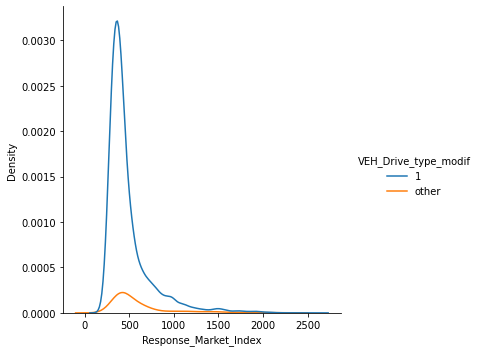

In [ ]:
sn.displot(df3, x = "Response_Market_Index", hue = 'VEH_Drive_type_modif', kind = 'kde', fill = False)

**Variable Dummification**

In [ ]:
VEH_Drive_type_modif_dum = pd.get_dummies(df3.VEH_Drive_type_modif, prefix = 'VEH_Drive_type')
col_to_delete.append('VEH_Drive_type_modif')

In [ ]:
df3 = df3.merge(VEH_Drive_type_modif_dum, left_index = True, right_index = True).reset_index(drop = True)

### Variable : VEH_Body

,VEH_Body,En pourcentage
10,4777,48.11
9,3344,33.68
1,1456,14.66
5,160,1.61
6,143,1.44
3,21,0.21
2,14,0.14
11,9,0.09
12,3,0.03
7,2,0.02


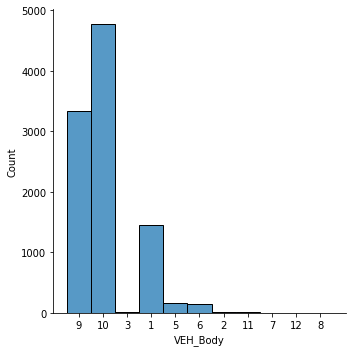

In [ ]:
sn.displot(df3.VEH_Body)

VEH_Body = pd.DataFrame(df3.VEH_Body.value_counts())
VEH_Body['En pourcentage'] = round(VEH_Body['VEH_Body']*100/np.sum(VEH_Body['VEH_Body']),2)
VEH_Body

**Variable Categorization**

In [ ]:
def change_VEH_Body (x):
  if x == '9': return '9'
  elif x == '10' : return '10'
  else : return 'other'

df3['VEH_Body_modif'] = df3.VEH_Body.apply(change_VEH_Body).astype('category')

col_to_delete.append('VEH_Body')

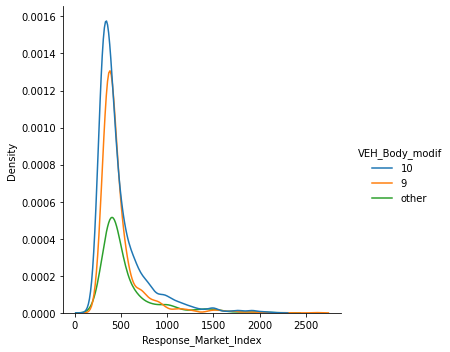

In [ ]:
sn.displot(df3, x = "Response_Market_Index", hue = 'VEH_Body_modif', kind = 'kde', fill = False)

**Variable Dummification**

In [ ]:
VEH_Body_modif_dum = pd.get_dummies(df3.VEH_Body_modif, prefix = 'VEH_Body_modif')
col_to_delete.append('VEH_Body_modif')

In [ ]:
df3 = df3.merge(VEH_Body_modif_dum, left_index = True, right_index = True).reset_index(drop = True)

### Variable : VEH_engine_HP

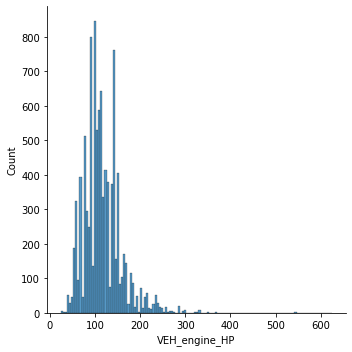

In [ ]:
sn.displot(df3.VEH_engine_HP)

**Switch to log**

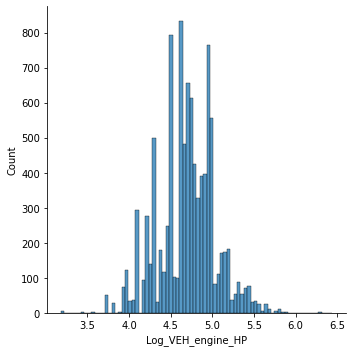

In [ ]:
df3['Log_VEH_engine_HP'] = np.log(df3.VEH_engine_HP)

sn.displot(df3.Log_VEH_engine_HP)

col_to_delete.append('VEH_engine_HP')

### Variable : VEH_pw_proportion

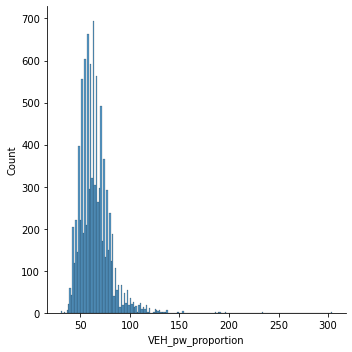

In [ ]:
sn.displot(df3.VEH_pw_proportion)

**Switch to log**

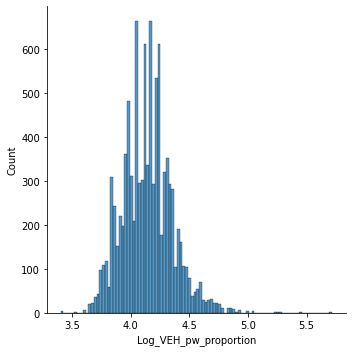

In [ ]:
df3['Log_VEH_pw_proportion'] = np.log(df3.VEH_pw_proportion)

sn.displot(df3.Log_VEH_pw_proportion)

col_to_delete.append('VEH_pw_proportion')

### Variable : BEH_Number_Year_Insured

 10.0    4272
-1.0     1139
 7.0     1076
 5.0      586
 6.0      457
 2.0      454
 8.0      414
 3.0      349
 4.0      349
 1.0      338
 9.0      282
 0.0      214
Name: BEH_Number_Year_Insured, dtype: int64

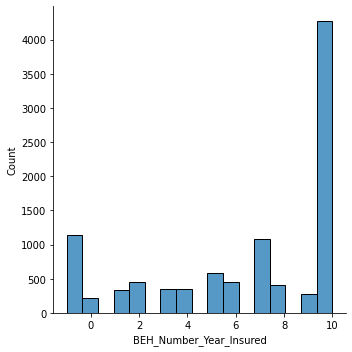

In [ ]:
sn.displot(df3.BEH_Number_Year_Insured)
df3.BEH_Number_Year_Insured.value_counts()

**Variable Categorization**

([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

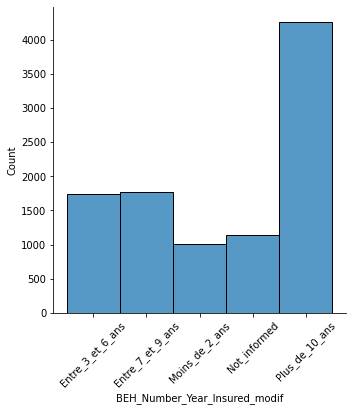

In [ ]:
def change_BEH_Number_Year_Insured (x):
  if x == -1 : return 'Not_informed'
  elif x <= 2 : return 'Moins_de_2_ans'
  elif 2 < x <= 6 : return 'Entre_3_et_6_ans'
  elif 6 < x <= 9 : return 'Entre_7_et_9_ans'
  elif x == 10 : return 'Plus_de_10_ans'

df3['BEH_Number_Year_Insured_modif'] = df3.BEH_Number_Year_Insured.apply(change_BEH_Number_Year_Insured).astype('category')

col_to_delete.append('BEH_Number_Year_Insured')

sn.displot(df3.BEH_Number_Year_Insured_modif)
plt.xticks(rotation = 45)

**Variable Dummification**

In [ ]:
BEH_Number_Year_Insured_modif_dum = pd.get_dummies(df3.BEH_Number_Year_Insured_modif, prefix = 'BEH_Number_Year_Insured')
col_to_delete.append('BEH_Number_Year_Insured_modif')

In [ ]:
df3 = df3.merge(BEH_Number_Year_Insured_modif_dum, left_index = True, right_index = True).reset_index(drop = True)

### Deleting variables

In [ ]:
col_to_delete

['Id',
 'PROD_Formula',
 'PER_previous_insurer',
 'PER_Age_oldest_child',
 'PER_previous_insurer_cat',
 'PER_Age_oldest_child_cat',
 'BEH_vehicule_usage',
 'PER_Age_Main_Driver',
 'PER_Insured_Before',
 'PER_sex',
 'PER_Sex_Second_Driver',
 'PER_Is_second_driver',
 'PER_Second_Driver_Age',
 'PER_Second_Driver_Age_modif',
 'CLA_BM',
 'CLA_BM_modif',
 'CLA_BM_TPL_DECLARED',
 'CLA_BM_TPL_DECLARED_modif',
 'VEH_Actual_Value',
 'VEH_Segment',
 'VEH_Segment_modif',
 'VEH_Top_Speed',
 'VEH_Drive_type',
 'VEH_Drive_type_modif',
 'VEH_Body',
 'VEH_Body_modif',
 'VEH_engine_HP',
 'VEH_pw_proportion',
 'BEH_Number_Year_Insured',
 'BEH_Number_Year_Insured_modif']

In [ ]:
col_to_delete.append('Response_Market_Index')
df4 = df3.drop(col_to_delete, axis = 1).reset_index(drop = True)

In [ ]:
first_column = df4.pop('Log_Response_Market_Index')
df4.insert(0, 'Log_Response_Market_Index', first_column)
df4.head()

,Log_Response_Market_Index,CLA_HISTORY,CLA_HISTORY_1Y,CLA_HISTORY_3Y,BEH_Mileage,PER_KIDS_ON_BOARD_ID,VEH_TransmissionId,PER_License_Age_Main_Driver,VEH_Age,VEH_fuel_type,...,VEH_Body_modif_10,VEH_Body_modif_9,VEH_Body_modif_other,Log_VEH_engine_HP,Log_VEH_pw_proportion,BEH_Number_Year_Insured_Entre_3_et_6_ans,BEH_Number_Year_Insured_Entre_7_et_9_ans,BEH_Number_Year_Insured_Moins_de_2_ans,BEH_Number_Year_Insured_Not_informed,BEH_Number_Year_Insured_Plus_de_10_ans
0,6.075346,1.0,1.0,1.0,13.0,3,7,31.0,15.0,1,...,0,1,0,4.499810,4.077537,0,0,0,0,1
1,6.411818,1.0,1.0,1.0,15.0,1,7,15.0,3.0,1,...,0,1,0,5.384495,4.663439,1,0,0,0,0
2,6.411818,1.0,1.0,1.0,15.0,1,7,15.0,3.0,1,...,0,1,0,5.384495,4.663439,1,0,0,0,0
3,6.001415,1.0,1.0,1.0,14.0,1,7,7.0,8.0,1,...,0,1,0,4.382027,3.931826,0,1,0,0,0
4,6.001415,1.0,1.0,1.0,14.0,1,7,7.0,8.0,1,...,0,1,0,4.382027,3.931826,0,1,0,0,0


## Correlation matrix

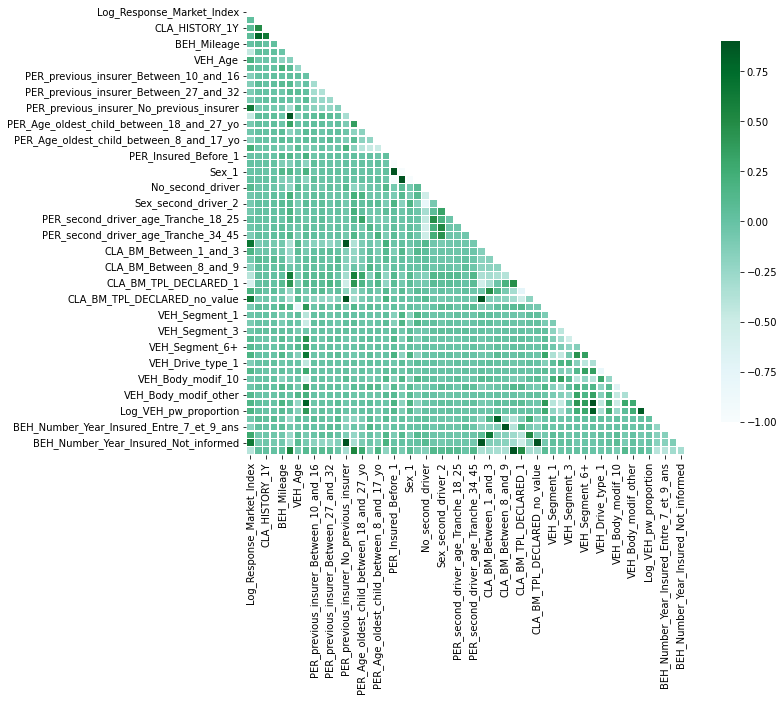

In [ ]:
corr = df4.corr(method = 'pearson')
fig, ax = plt.subplots(figsize = (10,10))
mask = np.triu(np.ones_like(corr, dtype = bool)) #mask upper triangle
sn.heatmap(corr, mask = mask, vmax = 0.9, cmap = 'BuGn', square = True, annot = False, linewidths = .5, cbar_kws = {"shrink": .7}, center = 0)

# Machine learning

In [ ]:
pip install shap

     |████████████████████████████████| 564 kB 7.9 MB/s 


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from statistics import mean

import statsmodels.api as sm

In [ ]:
seed = 0
y = df4['Log_Response_Market_Index']
X = df4.drop(['Log_Response_Market_Index'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)

In [ ]:
def mape (y_pred, y_test = y_test):
  mape = np.abs((y_test - y_pred) / y_test) * 100

  df_y_pred = pd.DataFrame(data = y_pred, columns = ['y_pred'])
  df_y_test = pd.DataFrame(data = list(y_test), columns = ['y_test'])
  df_mape = pd.DataFrame(data = list(mape), columns = ['mape'])
  df_error = pd.concat([df_y_pred, df_y_test, df_mape], axis = 1)
  df_error.head()
  return mape, df_error

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def median_absolute_percentage_error(y_true, y_pred):
    return np.median(np.abs((y_true - y_pred) / y_true)) * 100

def DataFrame_score (y_train_pred, y_pred, y_train = y_train, y_test = y_test):
  DF = pd.DataFrame(
    {'train': [mean_squared_error(y_train, y_train_pred),
               mean_absolute_error(y_train, y_train_pred),
               r2_score(y_train, y_train_pred),
               mean_absolute_percentage_error(y_train, y_train_pred),
               median_absolute_percentage_error(y_train, y_train_pred)],

     'test': [mean_squared_error(y_test, y_pred),
               mean_absolute_error(y_test, y_pred),
               r2_score(y_test, y_pred),
               mean_absolute_percentage_error(y_test, y_pred),
               median_absolute_percentage_error(y_test, y_pred)]},\

               index = ['MSE', 'MAE', 'R2', 'Mean_abs_perc_error', 'Median_abs_perc_error']
  )
  return DF

### <font color = 'blue'> <b> Linear Regression </b> </font>

In [ ]:
LR = LinearRegression()
LR.fit(X_train, y_train)
y_train_LR_pred = LR.predict(X_train)
y_LR_pred = LR.predict(X_test)

mape_LR, df_error_LR = mape(y_LR_pred, y_test)

DataFrame_score(y_train_LR_pred, y_LR_pred)

,train,test
MSE,0.047355,0.049991
MAE,0.167247,0.171331
R2,0.712926,0.683818
Mean_abs_perc_error,2.712953,2.780776
Median_abs_perc_error,2.228112,2.323753


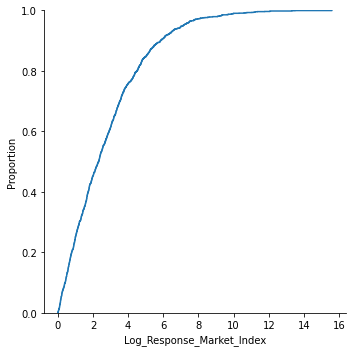

In [ ]:
sn.displot(mape_LR, kind = "ecdf")

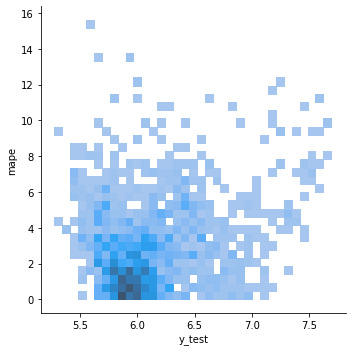

In [ ]:
sn.displot(df_error_LR, x = "y_test", y = "mape")

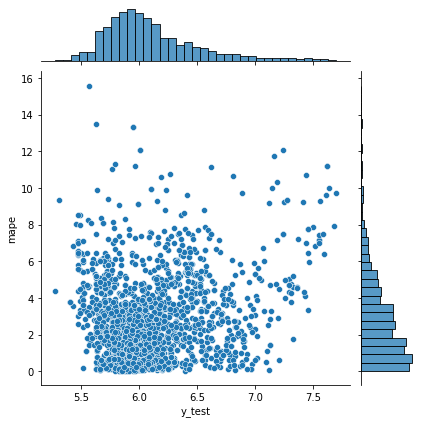

In [ ]:
sn.jointplot(data = df_error_LR, x = "y_test", y = "mape")

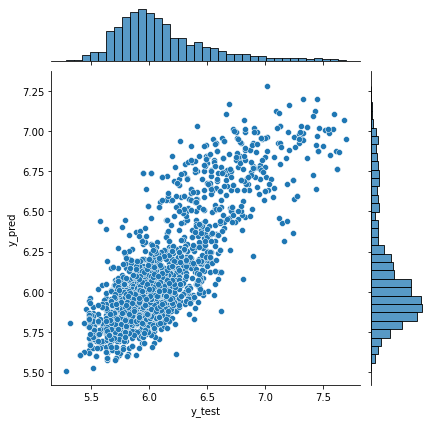

In [ ]:
sn.jointplot(data = df_error_LR, x = "y_test", y = "y_pred")

### <font color = 'blue'> <b> Random Forest </b> </font>

In [ ]:
RFR = RandomForestRegressor(n_estimators = 15, max_features = 30, max_depth = 30, random_state = seed)
RFR.fit(X_train, y_train)
y_train_RFR_pred = RFR.predict(X_train)
y_RFR_pred = RFR.predict(X_test)

mape_RFR, df_error_RFR = mape(y_RFR_pred, y_test)

DataFrame_score(y_train_RFR_pred, y_RFR_pred)

,train,test
MSE,0.004803,0.013316
MAE,0.038056,0.069583
R2,0.970883,0.915778
Mean_abs_perc_error,0.613962,1.122097
Median_abs_perc_error,0.280347,0.581436


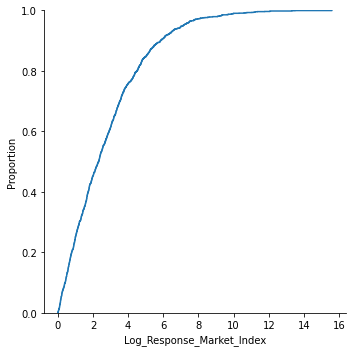

In [ ]:
sn.displot(mape_LR, kind = "ecdf")

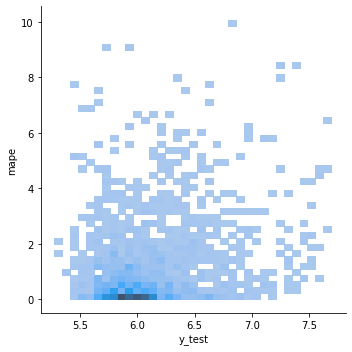

In [ ]:
sn.displot(df_error_RFR, x = "y_test", y = "mape")

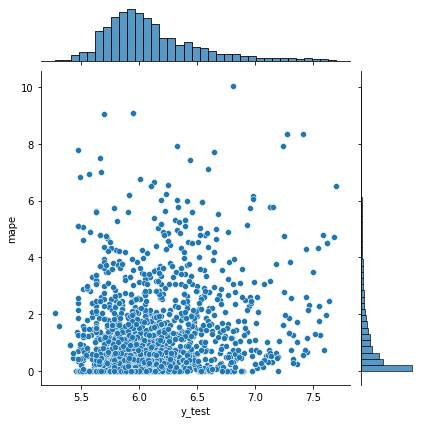

In [ ]:
sn.jointplot(data = df_error_RFR, x = "y_test", y = "mape")

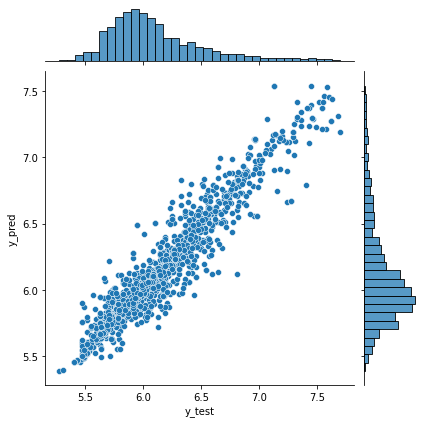

In [ ]:
sn.jointplot(data = df_error_RFR, x = "y_test", y = "y_pred")

In [ ]:
from sklearn.metrics import make_scorer

#define your own mse and set greater_is_better = False
mse = make_scorer(mean_squared_error,greater_is_better = False)

parameters = {'n_estimators' : [30,35,40,45,50,55,60], 'max_depth': [3,8,13,18,23,28,33],\
              'max_features' : [5,8,10,12]}

RFR_CV = RandomForestRegressor(random_state = seed)
RFR_reg = GridSearchCV(RFR_CV, parameters, scoring = mse)
RFR_reg.fit(X_train, y_train)

RFR_reg.best_params_
# max_depth = 28, max_features = 10, n_estimators = 60

{'max_depth': 28, 'max_features': 10, 'n_estimators': 60}

In [ ]:
'''
RFR_reg = RandomForestRegressor(max_depth = 28, max_features = 10, n_estimators = 60, random_state = seed)
RFR_reg.fit(X_train, y_train)
#'''

RandomForestRegressor(max_depth=28, max_features=10, n_estimators=60,
                      random_state=0)

In [ ]:
y_train_RFR2_pred = RFR_reg.predict(X_train)
y_RFR2_pred = RFR_reg.predict(X_test)

mape_RFR2, df_error_RFR2_reg = mape(y_RFR2_pred, y_test)

DataFrame_score(y_train_RFR2_pred, y_RFR2_pred)
# baisse infime

,train,test
MSE,0.004362,0.013147
MAE,0.036837,0.068562
R2,0.973556,0.916848
Mean_abs_perc_error,0.593911,1.104058
Median_abs_perc_error,0.256761,0.551652


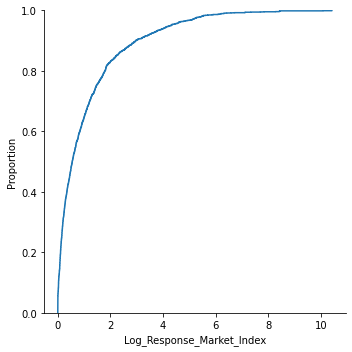

In [ ]:
sn.displot(mape_RFR2, kind = "ecdf")

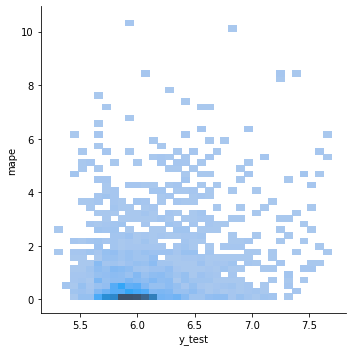

In [ ]:
sn.displot(df_error_RFR2_reg, x = "y_test", y = "mape")

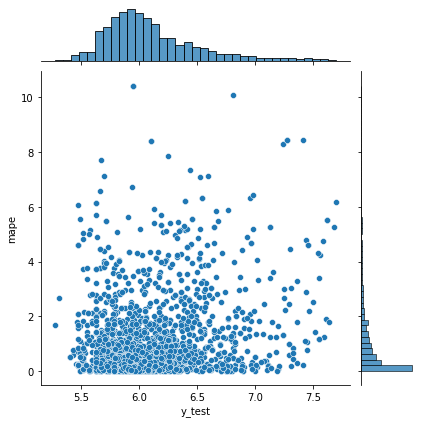

In [ ]:
sn.jointplot(data = df_error_RFR2_reg, x = "y_test", y = "mape")

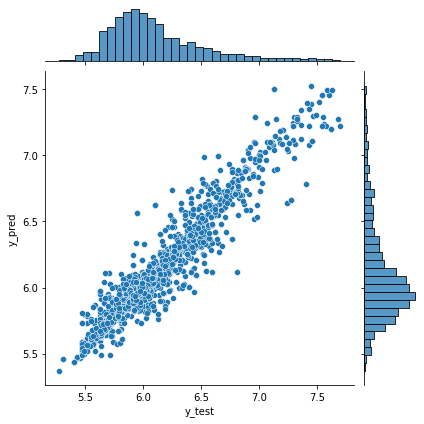

In [ ]:
sn.jointplot(data = df_error_RFR2_reg, x = "y_test", y = "y_pred")

### <font color = 'blue'> <b> Gradient Boosting </b> </font>

In [ ]:
GBR = GradientBoostingRegressor(learning_rate = 0.5, \
                                 max_depth = 100, max_features = 8, n_estimators = 150, random_state = seed)
GBR.fit(X_train, y_train)
y_train_GBR_pred = GBR.predict(X_train)
y_GBR_pred = GBR.predict(X_test)

mape_GBR, df_error_GBR = mape(y_GBR_pred, y_test)

DataFrame_score(y_train_GBR_pred, y_GBR_pred)

,train,test
MSE,0.002924,1.634055e-02
MAE,0.019397,5.633750e-02
R2,0.982273,8.966504e-01
Mean_abs_perc_error,0.313963,9.051091e-01
Median_abs_perc_error,0.000000,1.496366e-14


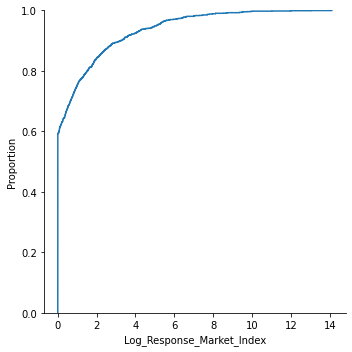

In [ ]:
sn.displot(mape_GBR, kind = "ecdf")

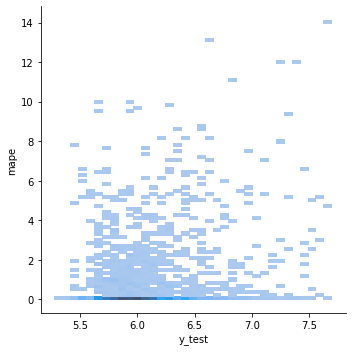

In [ ]:
sn.displot(df_error_GBR, x = "y_test", y = "mape")

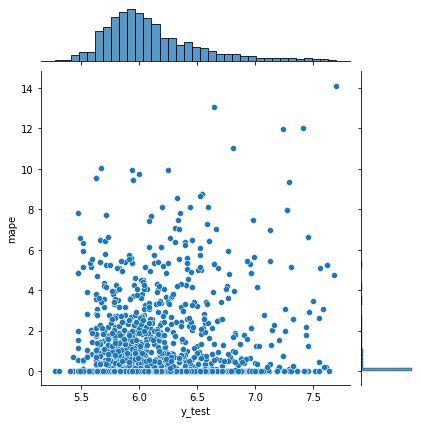

In [ ]:
sn.jointplot(data = df_error_GBR, x = "y_test", y = "mape")

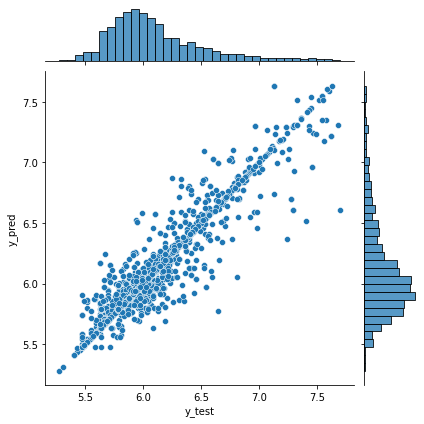

In [ ]:
sn.jointplot(data = df_error_GBR, x = "y_test", y = "y_pred")

In [ ]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }

GBR2 = GradientBoostingRegressor()
grid_GBR = GridSearchCV(estimator = GBR2, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)

grid_GBR.best_params_

'''
learning_rate = 0.01, max_depth = 10, n_estimators = 1500, subsample = 0.2
'''

{'learning_rate': 0.01,
 'max_depth': 10,
 'n_estimators': 1500,
 'subsample': 0.2}

In [ ]:
'''
grid_GBR = GradientBoostingRegressor(learning_rate = 0.01, max_depth = 10, n_estimators = 1500, subsample = 0.2)
grid_GBR.fit(X_train, y_train)
#'''

GradientBoostingRegressor(learning_rate=0.01, max_depth=10, n_estimators=1500,
                          subsample=0.2)

In [ ]:
y_train_GBR2_pred = grid_GBR.predict(X_train)
y_GBR2_pred = grid_GBR.predict(X_test)

mape_GBR2, df_error_GBR2 = mape(y_GBR2_pred, y_test)

DataFrame_score(y_train_GBR2_pred, y_GBR2_pred)

,train,test
MSE,0.004416,0.012560
MAE,0.043638,0.072531
R2,0.973227,0.920564
Mean_abs_perc_error,0.712924,1.178936
Median_abs_perc_error,0.460663,0.731195


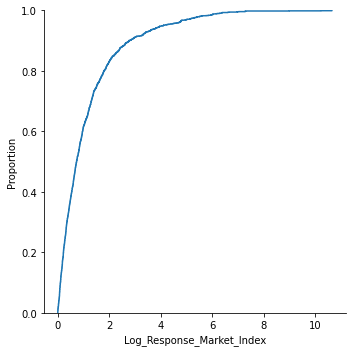

In [ ]:
sn.displot(mape_GBR2, kind = "ecdf")

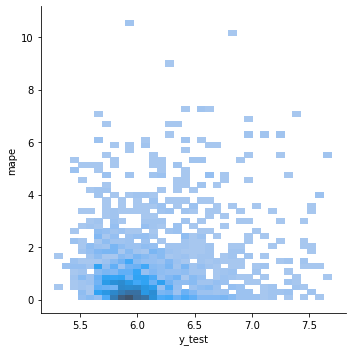

In [ ]:
sn.displot(df_error_GBR2, x = "y_test", y = "mape")

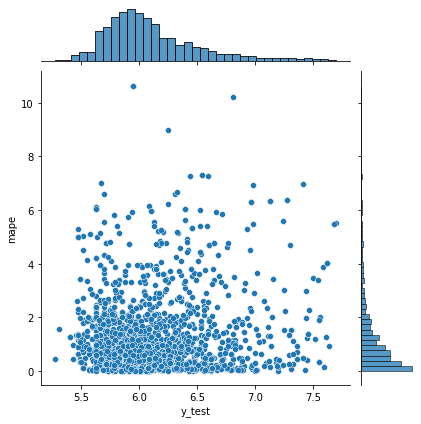

In [ ]:
sn.jointplot(data = df_error_GBR2, x = "y_test", y = "mape")

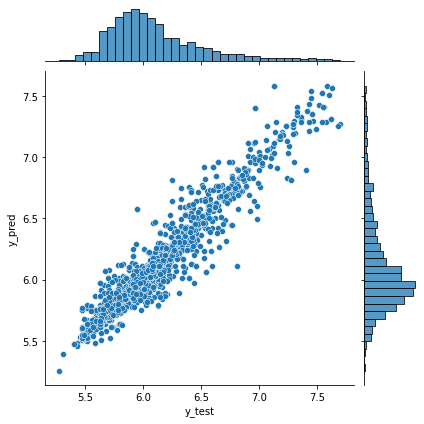

In [ ]:
sn.jointplot(data = df_error_GBR2, x = "y_test", y = "y_pred")

### <font color = 'blue'> <b> Epsilon-Support Vector Regression </b> </font>

In [ ]:
scale = StandardScaler()
scale.fit(X_train)

X_train_scal = scale.transform(X_train)
X_test_scal = scale.transform(X_test)
model = SVR(kernel = 'rbf', degree = 3, tol = 0.1, C = 20, gamma = 0.04, epsilon = 0.1)
model.fit(X_train_scal, y_train)
y_SVR_pred = model.predict(X_test_scal)
y_train_SVR_pred = model.predict(X_train_scal)

mape_SVR, df_error_SVR = mape(y_SVR_pred, y_test)

DataFrame_score(y_train_SVR_pred, y_SVR_pred)

,train,test
MSE,0.010913,0.019780
MAE,0.091397,0.110379
R2,0.933844,0.874895
Mean_abs_perc_error,1.496635,1.798846
Median_abs_perc_error,1.574671,1.654832


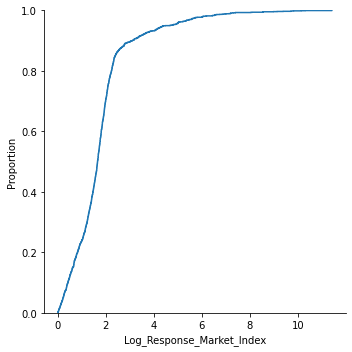

In [ ]:
sn.displot(mape_SVR, kind = "ecdf")

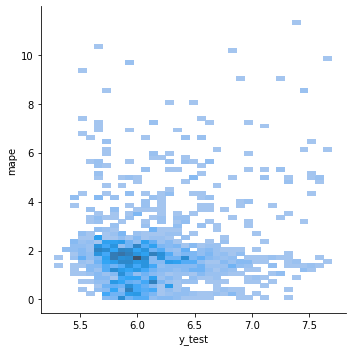

In [ ]:
sn.displot(df_error_SVR, x = "y_test", y = "mape")

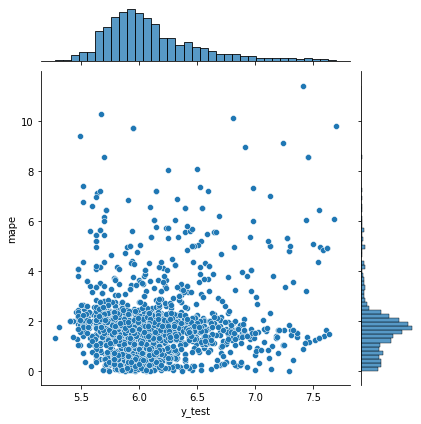

In [ ]:
sn.jointplot(data = df_error_SVR, x = "y_test", y = "mape")

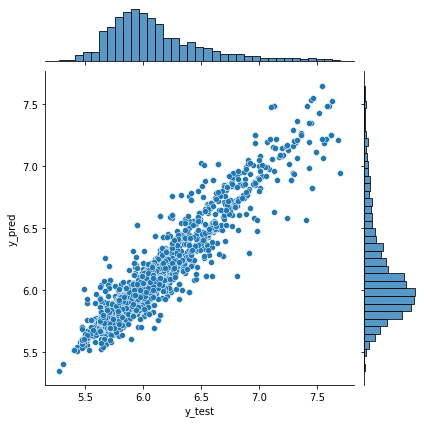

In [ ]:
sn.jointplot(data = df_error_SVR, x = "y_test", y = "y_pred")

# Interpretability of the selected model

In [ ]:
import shap
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [ ]:
explainer = shap.TreeExplainer(RFR_reg.fit(X_train, y_train))
shap_values = explainer.shap_values(X_test)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

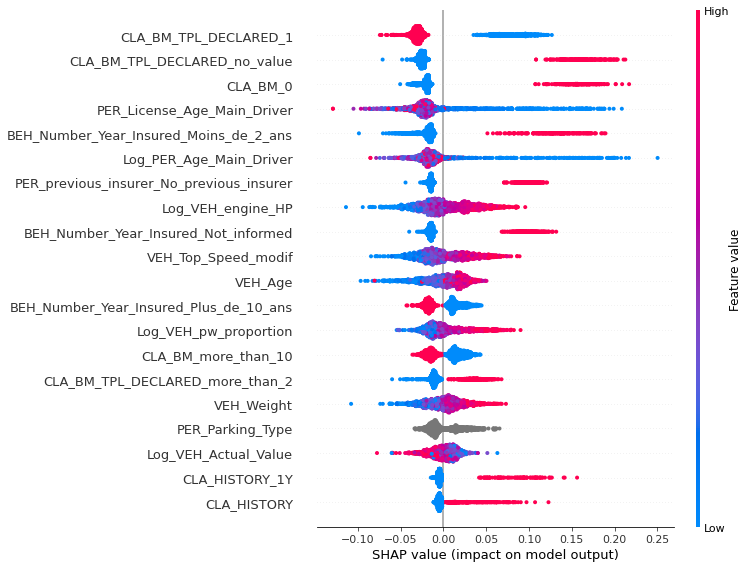

In [ ]:
shap.summary_plot(shap_values, X_test)

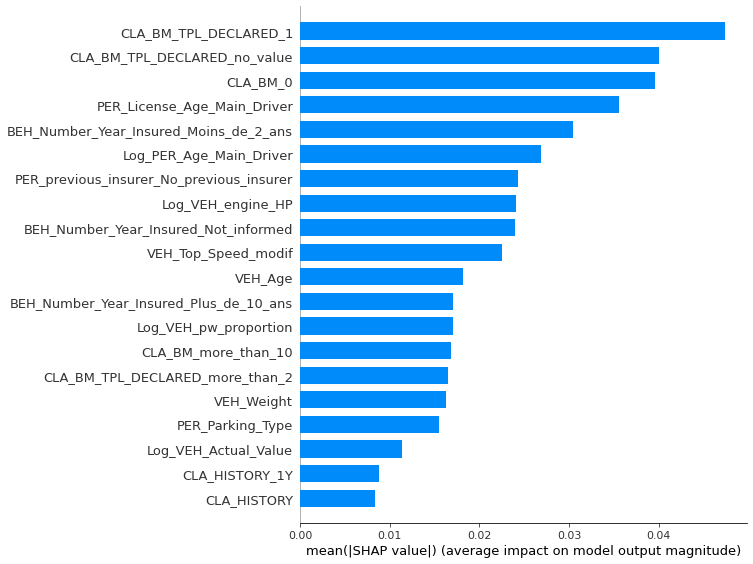

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type = "bar")

In [ ]:
df_pred = pd.DataFrame(data = y_RFR2_pred, columns = ['y_pred'] )

df_contribs = pd.DataFrame(
        shap_values,
        columns = [col + '_contrib' for col in X_test.columns],
        index = X_test.index).reset_index(drop = True)

df_test = X_test.reset_index(drop = True)

df_ytest = pd.DataFrame(list(y_test), columns = ['y_test'] ) # ligne modifiée

df = pd.concat([df_test, df_contribs, df_pred, df_ytest], axis = 1)
df['error']=  np.abs((df['y_test'] - df['y_pred'] )/ df['y_test'])
df['error2'] = (df['y_test']- df['y_pred'] )**2
df

,CLA_HISTORY,CLA_HISTORY_1Y,CLA_HISTORY_3Y,BEH_Mileage,PER_KIDS_ON_BOARD_ID,VEH_TransmissionId,PER_License_Age_Main_Driver,VEH_Age,VEH_fuel_type,PER_Parking_Type,...,Log_VEH_pw_proportion_contrib,BEH_Number_Year_Insured_Entre_3_et_6_ans_contrib,BEH_Number_Year_Insured_Entre_7_et_9_ans_contrib,BEH_Number_Year_Insured_Moins_de_2_ans_contrib,BEH_Number_Year_Insured_Not_informed_contrib,BEH_Number_Year_Insured_Plus_de_10_ans_contrib,y_pred,y_test,error,error2
0,1.0,1.0,1.0,15.0,3,7,4.0,11.0,2,3,...,-0.027159,0.004326,0.002195,-0.016880,0.102027,0.028107,6.813364,6.828712,0.002248,0.000236
1,1.0,1.0,1.0,14.0,2,7,9.0,1.0,1,1,...,0.038725,0.000052,-0.000227,-0.014927,-0.016485,0.016952,6.153690,6.165418,0.001902,0.000138
2,1.0,1.0,1.0,14.0,2,7,24.0,13.0,2,2,...,-0.000028,0.000360,-0.000197,-0.014664,-0.014678,-0.017522,6.034043,6.077642,0.007174,0.001901
3,1.0,1.0,1.0,14.0,2,7,10.0,8.0,2,1,...,-0.029981,-0.001692,-0.000256,-0.018261,-0.015220,-0.020420,5.568624,5.560682,0.001428,0.000063
4,1.0,1.0,1.0,13.0,3,8,27.0,2.0,1,4,...,0.035478,0.000791,-0.000438,-0.012243,-0.014832,-0.016157,6.126869,6.126869,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,2.0,1.0,2.0,13.0,2,7,9.0,12.0,2,3,...,-0.024651,-0.004950,-0.014064,-0.021489,-0.017819,0.004237,5.734350,5.690359,0.007731,0.001935
1982,1.0,1.0,1.0,12.0,2,7,1.0,5.0,1,3,...,-0.006741,0.004789,0.004130,0.136482,-0.018616,0.027119,6.596062,6.428105,0.026128,0.028209
1983,1.0,1.0,1.0,14.0,3,8,25.0,5.0,2,2,...,-0.002538,0.003404,-0.008610,-0.032014,-0.020862,0.013658,6.116647,6.084499,0.005283,0.001033
1984,1.0,1.0,1.0,13.0,1,7,8.0,9.0,1,2,...,-0.008467,0.002717,0.003407,0.098503,-0.015272,0.015605,6.129921,6.274461,0.023036,0.020892


In [ ]:
X_embedded = TSNE(n_components=2).fit_transform(df[[col for col in df.columns if col.endswith('_contrib')]])
df[['comp1', 'comp2']] = X_embedded

X_embedded = TSNE(n_components=2).fit_transform(df[df_test.columns])
df[['comp1_clients', 'comp2_clients']] = X_embedded

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


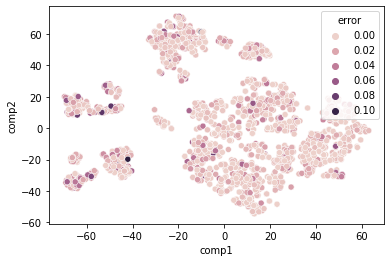

In [ ]:
sn.scatterplot(df['comp1'], df['comp2'], hue = df['error'])

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


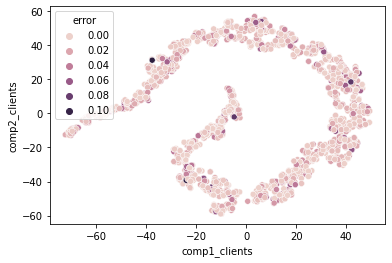

In [ ]:
sn.scatterplot(df['comp1_clients'], df['comp2_clients'], hue = df['error'])

In [ ]:
kmeans = KMeans(n_clusters=15, random_state=0).fit(df[[col for col in df.columns if col.endswith('_contrib')]])
df['clusters'] = kmeans.labels_

kmeans = KMeans(n_clusters=15, random_state=0).fit(df[df_test.columns])
df['clusters_clients'] = kmeans.labels_

In [ ]:
a = df.groupby(['clusters'])[['error']].agg(['mean', 'count']).reset_index()
a.columns = ['clusters', 'error_mean', 'clusters_count']
a.sort_values(by = 'error_mean')

,clusters,error_mean,clusters_count
9,9,0.006699,193
3,3,0.008225,27
8,8,0.008718,256
6,6,0.008811,463
12,12,0.009335,320
0,0,0.010370,79
2,2,0.011869,220
7,7,0.012167,14
14,14,0.012664,65
5,5,0.015647,128


In [ ]:
a = df.groupby(['clusters_clients'])[['error']].agg(['mean', 'count']).reset_index()
a.columns = ['clusters_clients', 'mean', 'count']
a.sort_values(by = 'mean')

,clusters_clients,mean,count
14,14,0.008491,154
9,9,0.008711,14
1,1,0.009780,228
5,5,0.009791,71
8,8,0.010060,254
6,6,0.010183,116
10,10,0.010645,56
3,3,0.010974,24
13,13,0.010990,79
12,12,0.011012,81


In [ ]:
df[df['clusters'] == 10]

,CLA_HISTORY,CLA_HISTORY_1Y,CLA_HISTORY_3Y,BEH_Mileage,PER_KIDS_ON_BOARD_ID,VEH_TransmissionId,PER_License_Age_Main_Driver,VEH_Age,VEH_fuel_type,PER_Parking_Type,...,y_pred,y_test,error,error2,comp1,comp2,comp1_clients,comp2_clients,clusters,clusters_clients
61,1.0,1.0,1.0,14.0,1,7,15.0,1.0,2,1,...,6.674177,6.824374,0.022009,0.022559,-66.040756,8.778859,-5.424462,1.851167,10,10
123,1.0,1.0,1.0,13.0,3,7,6.0,4.0,1,2,...,6.251732,6.171701,0.012967,0.006405,-60.160412,16.880047,36.893284,30.261477,10,4
153,2.0,2.0,2.0,13.0,1,7,9.0,1.0,1,2,...,6.348279,6.308098,0.006370,0.001614,-64.936798,20.837845,-46.586151,5.081284,10,13
164,1.0,1.0,1.0,16.0,3,7,8.0,6.0,2,3,...,6.708749,6.714171,0.000808,0.000029,-59.512722,13.470799,-29.846436,28.601528,10,2
222,2.0,1.0,2.0,14.0,1,7,11.0,9.0,2,2,...,6.607793,6.617403,0.001452,0.000092,-63.297291,11.089896,-9.055551,-48.223598,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,1.0,1.0,1.0,12.0,2,7,9.0,11.0,1,1,...,6.069522,6.028279,0.006842,0.001701,-64.563210,17.829552,-63.964355,-4.669165,10,5
1943,1.0,1.0,1.0,13.0,3,7,38.0,10.0,1,2,...,6.386757,6.425436,0.006020,0.001496,-29.567516,5.103054,-12.990670,42.412666,10,14
1947,1.0,1.0,1.0,16.0,2,7,9.0,1.0,2,4,...,6.399888,6.405179,0.000826,0.000028,-67.930672,11.997571,-22.602516,-31.988873,10,6
1967,2.0,2.0,2.0,13.0,3,7,10.0,11.0,1,3,...,6.369132,6.767688,0.058891,0.158847,-63.751087,20.142426,3.865527,53.373878,10,0


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


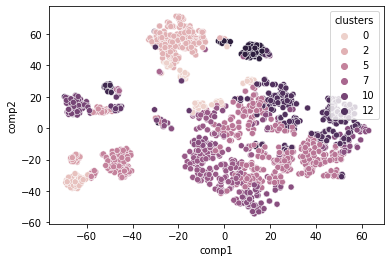

In [ ]:
sn.scatterplot(df['comp1'], df['comp2'], hue = df['clusters'])

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


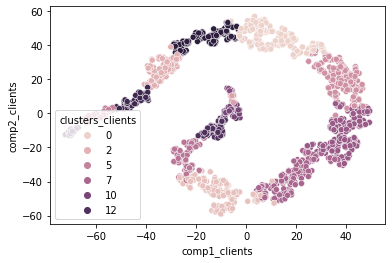

In [ ]:
sn.scatterplot(df['comp1_clients'], df['comp2_clients'], hue = df['clusters_clients'])

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


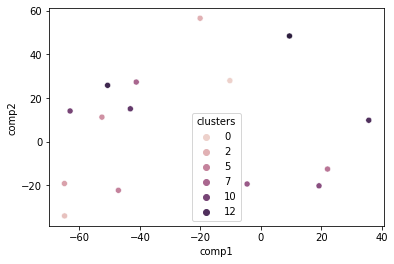

In [ ]:
df_clusters = df.groupby(['clusters']).mean().reset_index()
sn.scatterplot(df_clusters['comp1'], df_clusters['comp2'], hue = df_clusters['clusters'])